# Venn Diagrams

## Kate Wall
## Last Edit: Jan. 24, 2021
## How to easily make a Venn Diagrams from pandas DataFrames


In [1]:
from collections import Counter
from matplotlib_venn import venn2, venn3
import matplotlib.pyplot as plt
import pandas as pd
from IPython.core.display import HTML
def multi_table(table_list): #for visualizing tables in the same cell
  return HTML(
      '<table><tr style="background-color:white;">' +
      ''.join(['<td>' + table._repr_html_() + '</td>' for table in table_list]) +
      '</tr></table>'
  ) #https://github.com/epmoyer/ipy_table/issues/24

# Setup

In [2]:
groupA = ['person1','person2','person3','person4','person5','person6','person7']
groupB = ['person1','person2','person3',                                        'person8','person9']
groupC = ['person1','person2',          'person4',                                        'person9','person10']
dfA = pd.DataFrame(groupA,columns=['A'])
dfB = pd.DataFrame(groupB,columns=['B'])
dfC = pd.DataFrame(groupC,columns=['C'])
multi_table([dfA,dfB,dfC])

,A
0,person1
1,person2
2,person3
3,person4
4,person5
5,person6
6,person7
,B
0,person1
1,person2


In [3]:
people = ['person1','person2','person3','person4','person5','person6','person7','person8','person9','person10']
names =  ['angela ','nick   ','harry  ','nicole ','britney','haseem ','anna   ','sarah  ','taylor ','jim     ']
roster = pd.DataFrame(zip(people,names),columns=['people','name'])
roster

,people,name
0,person1,angela
1,person2,nick
2,person3,harry
3,person4,nicole
4,person5,britney
5,person6,haseem
6,person7,anna
7,person8,sarah
8,person9,taylor
9,person10,jim


In [4]:
mapRoster = roster.set_index('people').squeeze().to_dict()
mapRoster

{'person1': 'angela ',
 'person10': 'jim     ',
 'person2': 'nick   ',
 'person3': 'harry  ',
 'person4': 'nicole ',
 'person5': 'britney',
 'person6': 'haseem ',
 'person7': 'anna   ',
 'person8': 'sarah  ',
 'person9': 'taylor '}

In [5]:
dfA['ANames'] = dfA.A.map(mapRoster)
dfB['BNames'] = dfB.B.map(mapRoster)
dfC['CNames'] = dfC.C.map(mapRoster)
multi_table([dfA,dfB,dfC])

,A,ANames
0,person1,angela
1,person2,nick
2,person3,harry
3,person4,nicole
4,person5,britney
5,person6,haseem
6,person7,anna
,B,BNames
0,person1,angela
1,person2,nick


In [6]:
del dfA['A'],dfB['B'],dfC['C']
multi_table([dfA,dfB,dfC])

,ANames
0,angela
1,nick
2,harry
3,nicole
4,britney
5,haseem
6,anna
,BNames
0,angela
1,nick


# Three-Way Venn Diagram

In [7]:
A = set(dfA.ANames)
B = set(dfB.BNames)
C = set(dfC.CNames)

AB_overlap = A & B
AC_overlap = A & C
BC_overlap = B & C
ABC_overlap = A & B & C

A_rest = A - AB_overlap - AC_overlap
B_rest = B - AB_overlap - BC_overlap
C_rest = C - AC_overlap - BC_overlap

AB_only = AB_overlap - ABC_overlap
AC_only = AC_overlap - ABC_overlap
BC_only = BC_overlap - ABC_overlap

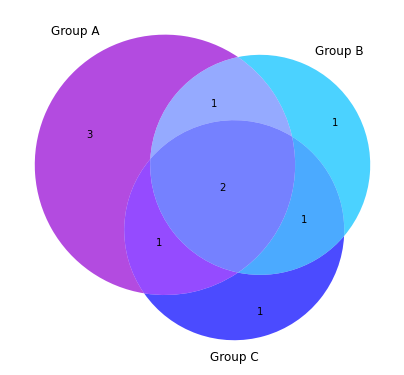

In [8]:
sets = Counter()               #set order A, B, C  
sets['100'] = len(A_rest)      #100 denotes A on, B off, C off
sets['001'] = len(C_rest)      #001 denotes A off, B off, C on
sets['010'] = len(B_rest)      #010 denotes A off, B on, C off
sets['101'] = len(AC_only)     #101 denotes A on, B off, C on
sets['110'] = len(AB_only)     #110 denotes A on, B on, C off
sets['011'] = len(BC_only)     #011 denotes A off, B on, C on
sets['111'] = len(ABC_overlap) #011 denotes A on, B on, C on
labels = ('Group A', 'Group B', 'Group C')

plt.figure(figsize=(7,7))
ax = plt.gca()
venn3(subsets=sets, set_labels=labels, ax=ax,set_colors=('darkviolet','deepskyblue','blue'),alpha=0.7)   
plt.show()

## Set the "set label" color (e.g. Group A) 

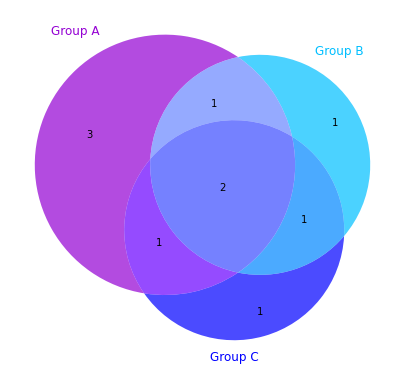

In [9]:
plt.figure(figsize=(7,7))
ax = plt.gca()
colors = ['darkviolet','deepskyblue','blue']
v = venn3(subsets=sets, set_labels=labels, ax=ax,set_colors=('darkviolet','deepskyblue','blue'),alpha=0.7)   
i = 0
for text in v.set_labels:
  text.set_color(colors[i])
  i+=1
plt.show()

## Set the "subset label" color (e.g. 1,2,3)

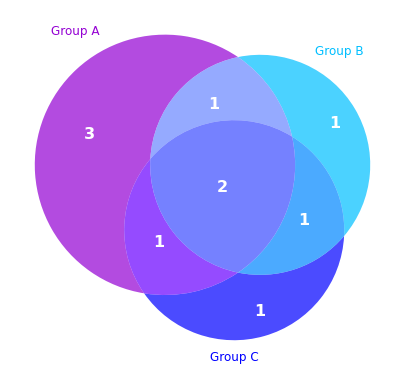

In [10]:
plt.figure(figsize=(7,7))
ax = plt.gca()
colors = ['darkviolet','deepskyblue','blue']
v = venn3(subsets=sets, set_labels=labels, ax=ax,set_colors=('darkviolet','deepskyblue','blue'),alpha=0.7)   
i = 0
for text in v.set_labels:
  text.set_color(colors[i])
  i+=1

for text in v.subset_labels:
  text.set_color('white')
  text.set_fontsize(16)
  text.set_fontweight('bold')
plt.show()

## Replace the labels with a legend

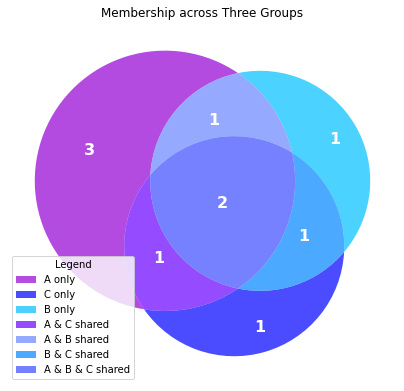

In [11]:
plt.figure(figsize=(7,7))
ax = plt.gca()
v = venn3(subsets=sets, set_labels=('','',''), ax=ax,set_colors=('darkviolet','deepskyblue','blue'),alpha=0.7)  
for text in v.subset_labels:
  text.set_color('white')
  text.set_fontsize(16)
  text.set_fontweight('bold')

h = [] 
for i in sets:
    h.append(v.get_patch_by_id(i)) #get color patches 
l = ['A only','C only','B only','A & C shared','A & B shared','B & C shared','A & B & C shared']
ax.legend(handles=h, labels=l, title="Legend",loc='lower left')  #write labels for color patches
plt.title('Membership across Three Groups')
plt.show()

## Customize the legend contents

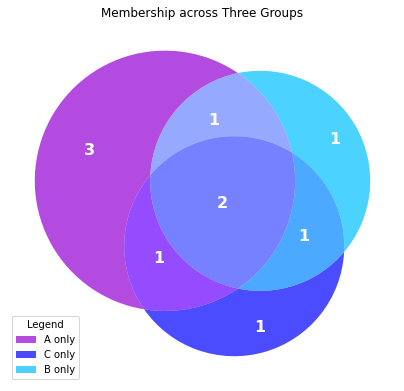

In [12]:
plt.figure(figsize=(7,7))
ax = plt.gca()
v = venn3(subsets=sets, set_labels=('','',''), ax=ax,set_colors=('darkviolet','deepskyblue','blue'),alpha=0.7)
for text in v.subset_labels:
  text.set_color('white')
  text.set_fontsize(16)
  text.set_fontweight('bold')

ax.legend(handles=h[0:3], labels=l[0:3], title="Legend",loc='lower left') #create tailored legend from handles and labels    
plt.title('Membership across Three Groups')
plt.show()

# Two-Way Venn Diagram 

In [13]:
multi_table([dfA,dfB])

,ANames
0,angela
1,nick
2,harry
3,nicole
4,britney
5,haseem
6,anna
,BNames
0,angela
1,nick


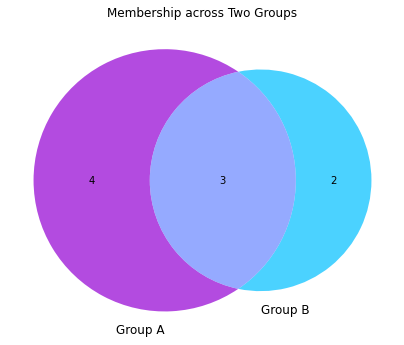

In [14]:
sets = Counter()               #set order A, B  
sets['10'] = len(A-AB_overlap) #10 denotes A on, B off
sets['01'] = len(B-AB_overlap) #01 denotes A off, B on
sets['11'] = len(AB_overlap)   #11 denotes A on, B on
labels = ('Group A', 'Group B')

plt.figure(figsize=(7,7))
ax = plt.gca()
v= venn2(subsets=sets, set_labels=labels, ax=ax,set_colors=('darkviolet','deepskyblue'),alpha=0.7)
plt.title('Membership across Two Groups')
plt.show()